## <div class="alert alert-block alert-info"> Imports<div>

In [1]:
# My Modules
import wrangle_zillow as wr
import explore_zillow as ex
import stats_conclude as sc
import evaluate_zillow as ev

# Imports
import env
import os

# Numbers
import pandas as pd 
import numpy as np
import scipy.stats as stats

# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

Load in successful, awaiting commands...


## <div class="alert alert-block alert-info"> Wrangle <div>

In [2]:
# getting/creating the csv
df = wr.get_zillow_261()

CSV file found and loaded


### Second Iteration:

* The cleaning process is below:

In [3]:
# identifying outliers
wr.outliers_zillow(df, 1.5)

Bedroomcnt: upper,lower (5.5, 1.5)
Bathroomcnt: upper,lower (4.5, 0.5)
Calculatedfinishedsquarefeet: upper,lower (3634.5, -169.5)
Taxvaluedollarcnt: upper,lower (1054062.125, -331364.875)
Yearbuilt: upper,lower (2016.5, 1908.5)
Taxamount: upper,lower (12233.329999999998, -3284.0299999999993)
Fips: upper,lower (6092.0, 6004.0)
Propertylandusetypeid: upper,lower (261.0, 261.0)
Parcelid: upper,lower (17651612.5, 8063540.5)
---


In [4]:
# cleaning the data
df_clean = wr.wrangle_zillow(df)
df_clean.head()

Returning Zillow's Single Family Residential Homes from 2017
--------------------------------------------
Renamed columns for ease of use
NaN's removed: Percent Original Data Remaining: 99.0
Moved target column to index 0 for ease of assignment
Bed and year data types changed from float to integer
Changed FIPS code to actual county name
Outliers removed: Percent Original Data Remaining: 91.0
 Sqft <= 5,000 and > 0
 Property Taxes <= $12,233 and > 0
 Bathrooms <= 5 and > 0
 Bedrooms <= 6 and > 0
 Built after 1908
 Assessed Worth <= $1,054,062 and > 0
Encoded County column and renamed encoded columns for readability
DataFrame is clean and ready for exploration :)


,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura
4,296425.0,4,2.0,3633.0,2005,6941.39,0,0
6,847770.0,3,4.0,1620.0,2011,10244.94,0,0
7,646760.0,3,2.0,2077.0,1926,7924.68,0,0
18,169471.0,3,1.0,1244.0,1950,2532.88,0,0
19,233266.0,3,2.0,1300.0,1950,3110.99,0,0


## <div class="alert alert-block alert-info"> Split <div>

In [5]:
train, validate, test = wr.split_zillow(df_clean)

Prepared DF: (1957985, 8)
Train: (1096471, 8)
Validate: (469917, 8)
Test: (391597, 8)


In [6]:
# seeing what columns we need to change in order to scale and model
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0


In [7]:
# savings function returns to variables
X_train, y_train, X_validate, y_validate, X_test, y_test = wr.x_y_train_validate_test(train, validate, test, 'assessed_worth')

Variable assignment successful...
Verifying number of features and target:
Train: ((1096471, 7), (1096471, 1))
Validate: ((469917, 7), (469917, 1))
Test: ((391597, 7), (391597, 1))


In [8]:
# ready for scaling and modeling
X_train.head()

,bed,bath,sqft,year,property_taxes,orange,ventura
1954106,3,2.0,1551.0,1950,6034.28,0,0
934733,3,1.5,1322.0,1957,943.38,1,0
707024,4,3.0,2757.0,1964,8794.01,0,0
1129674,2,2.5,1430.0,1975,2216.12,1,0
458836,3,1.0,1722.0,1947,3345.51,0,0


## <div class="alert alert-block alert-info"> Scale <div>

I have removed some outliers and will utilize the MinMax scaler for this second iteration.

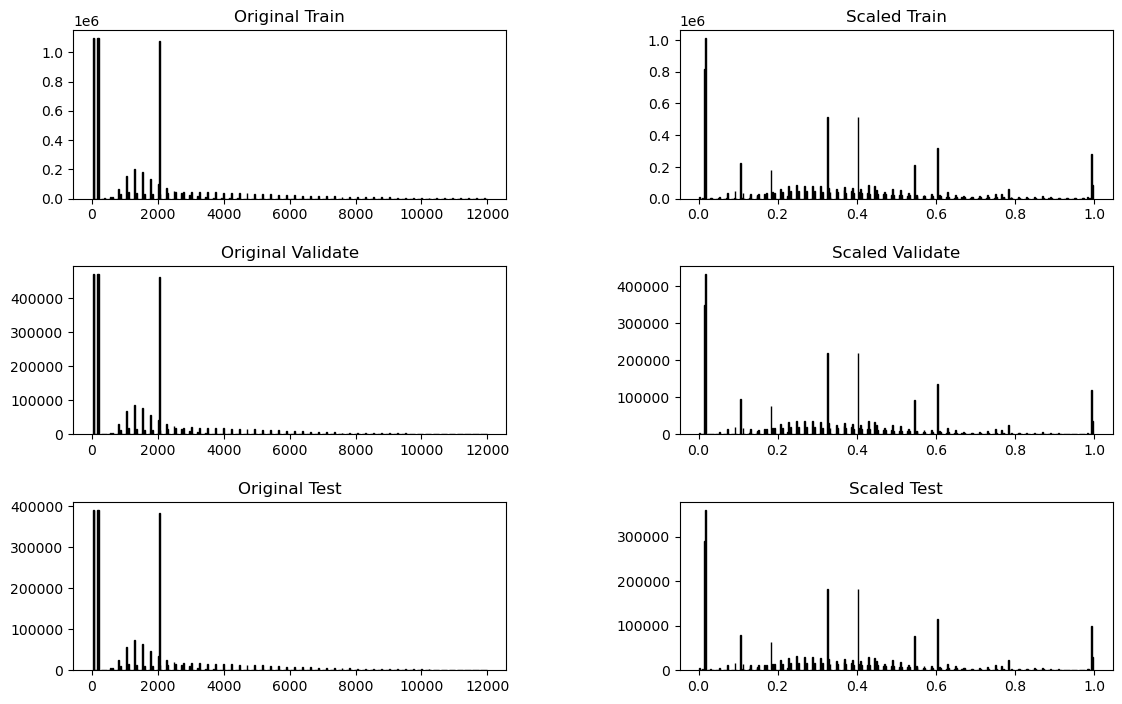

In [9]:
X_train_scaled_mm, X_validate_scaled_mm, X_test_scaled_mm = wr.scale_zillow_2(X_train, X_validate, X_test)

In [10]:
# verfiying scaled df is ready to model
X_train_scaled_mm.head()

,0,1,2,3,4,5,6
0,0.4,0.333333,0.310062,0.388889,0.502175,0.0,0.0
1,0.4,0.222222,0.264253,0.453704,0.077348,1.0,0.0
2,0.6,0.555556,0.551310,0.518519,0.732470,0.0,0.0
3,0.2,0.444444,0.285857,0.620370,0.183556,1.0,0.0
4,0.4,0.111111,0.344269,0.361111,0.277802,0.0,0.0


## <div class="alert alert-block alert-info"> Explore <div> 
 
Dataframe = Train
    
---
    
**Target = Assessed Worth**
    
---
    
**Goal:** To predict assessed worth of single family residential properties using data from 2017.
    
---
    
**Questions:**
    
* What features contribute to assessed worth the most?
    * the least?
* Where are the strongest correlations?
* What are my two top features?
    
What kind of linear regression will we use?
    
* Multivariate and simple linear regression

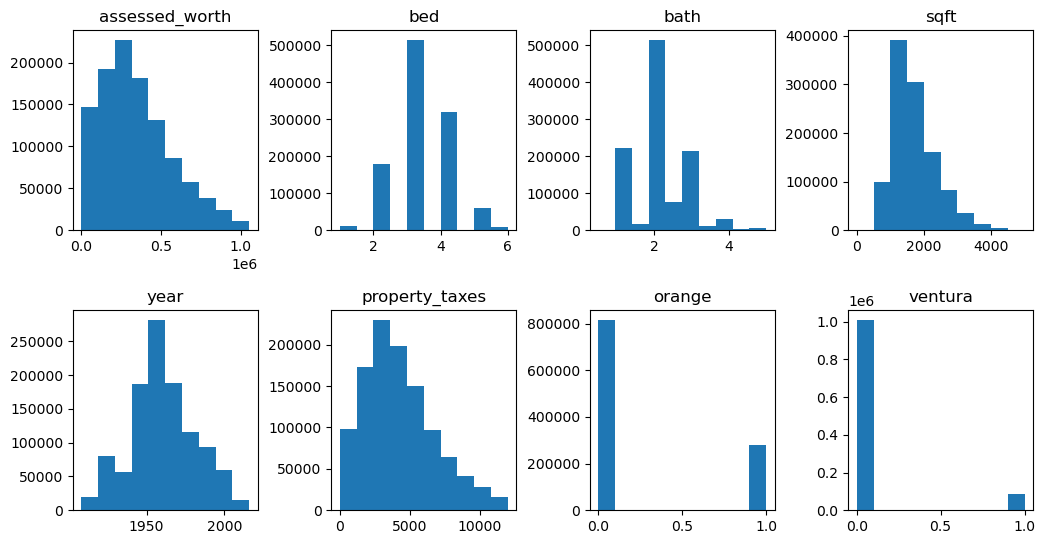

In [11]:
# looking at the hist of the train dataset
ex.hist_zillow(train)

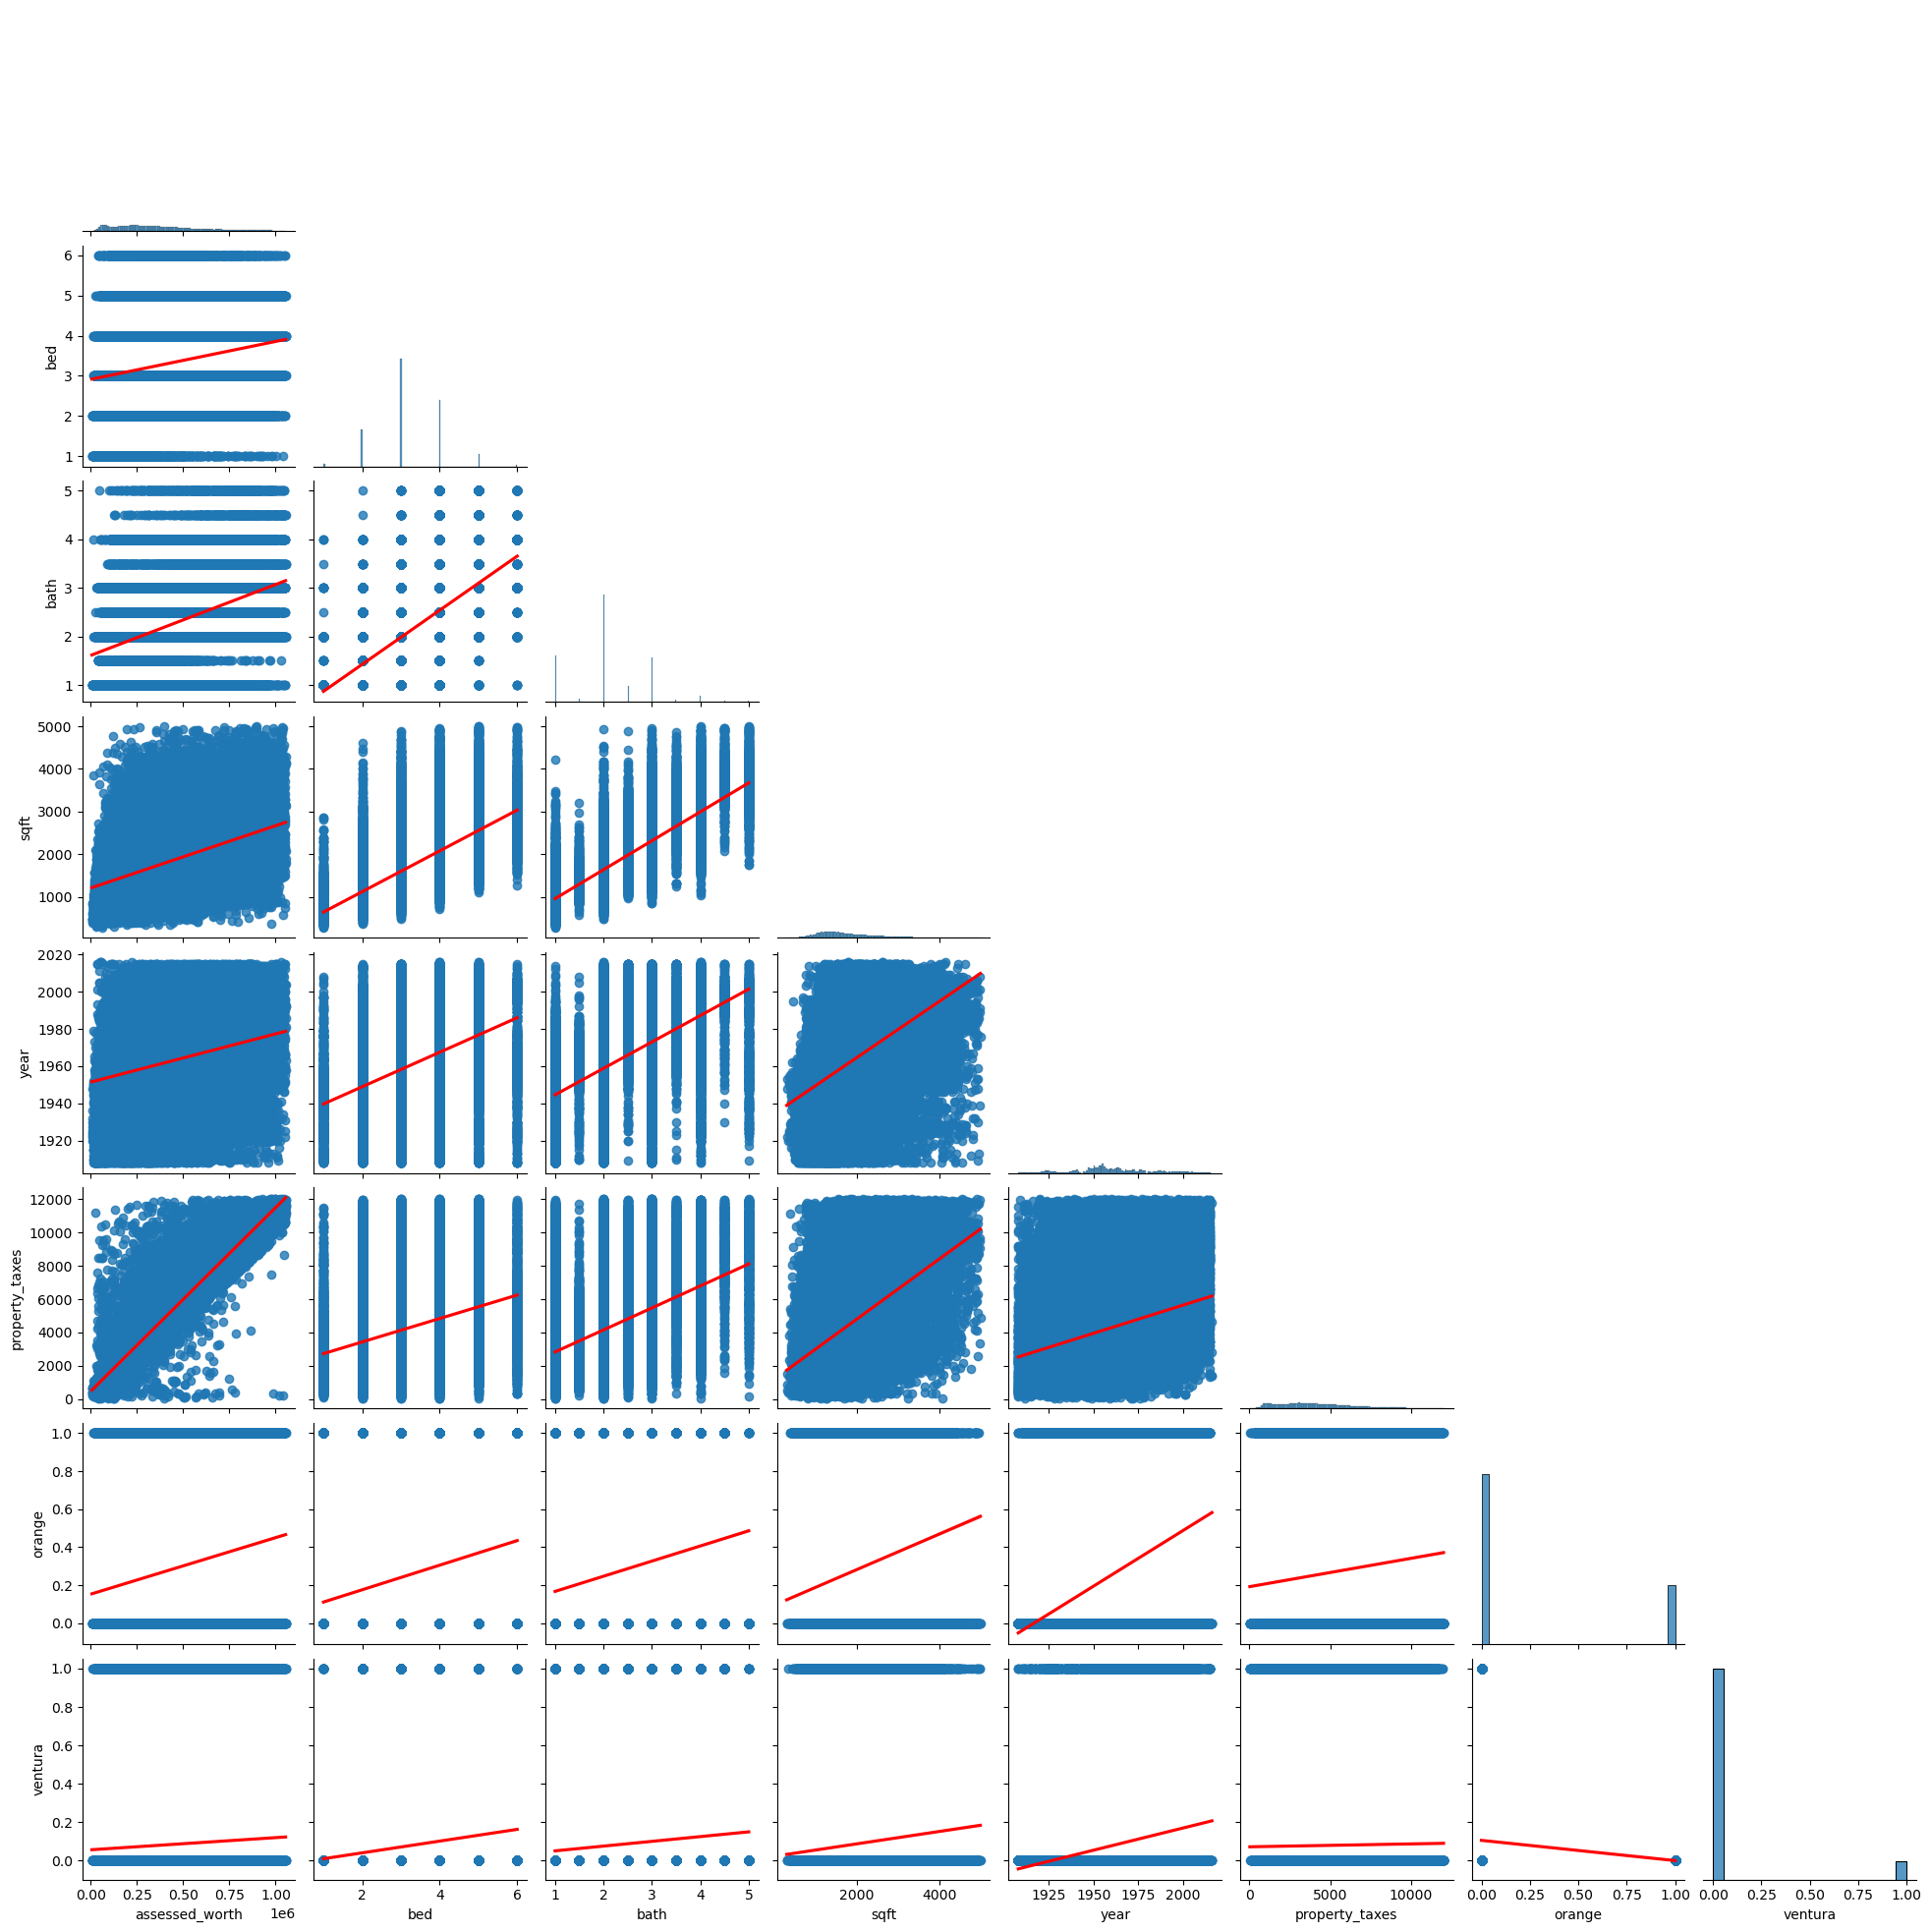

In [12]:
# looking at the pairwise relationships
ex.plot_variable_pairs_120K(train)

<div class="alert alert-block alert-info">  

### Takeaways:

**Target = Assessed Worth**

Low Significance Visually: 
* Bed 

Higher Significance Visually:
* Property Taxes
    * It is derived from target
* Year
* Bath
* Sqft

Relationships:

* Bath and Year, Sqft, Property Taxes
* Sqft and Propety Taxes
    
<div> 

Numerical Columns


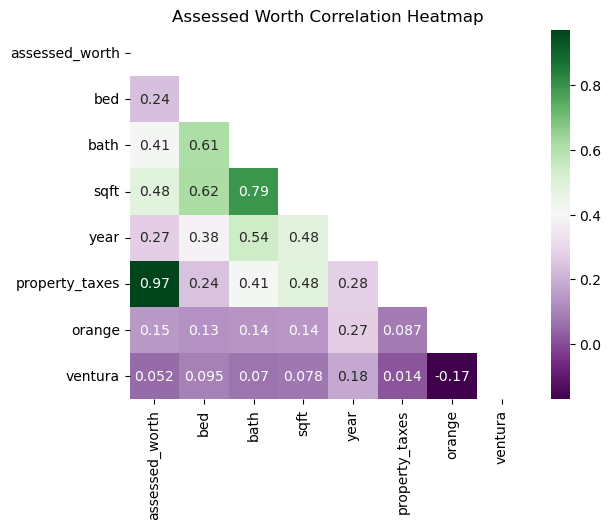

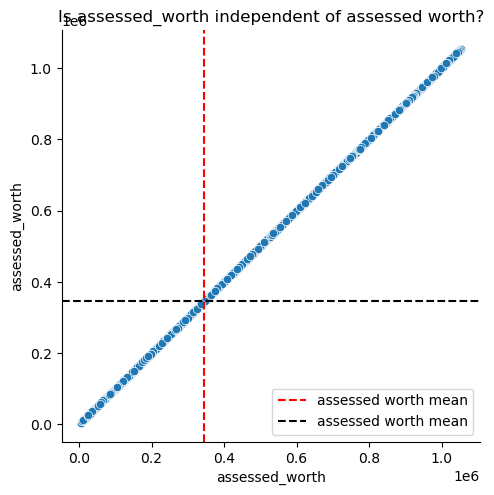

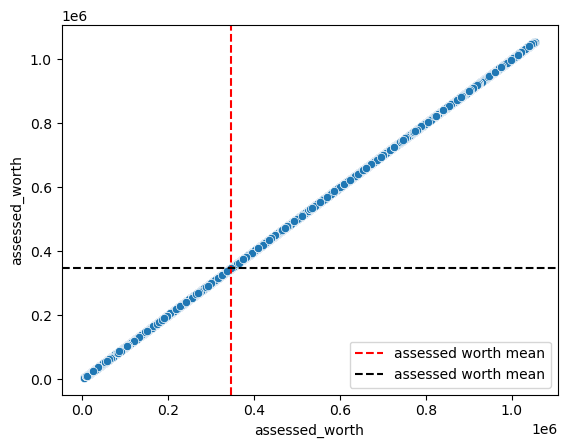

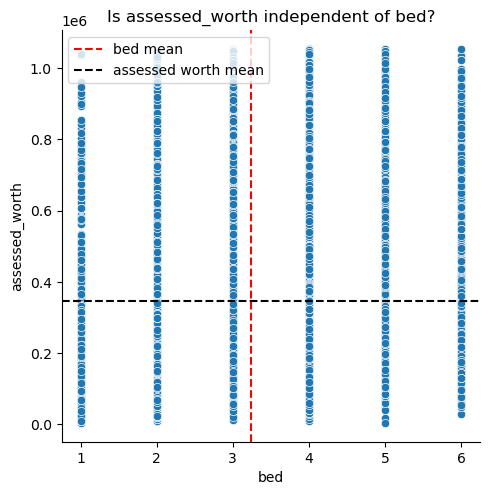

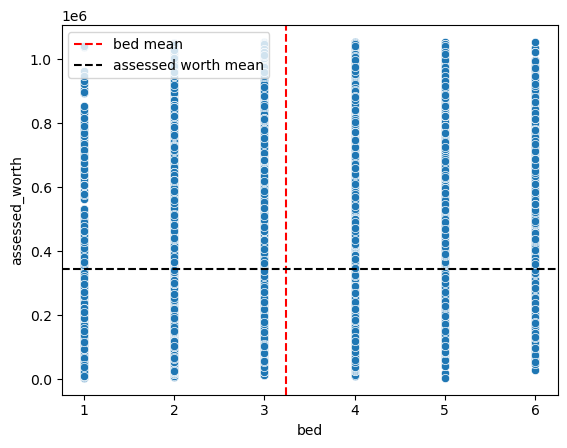

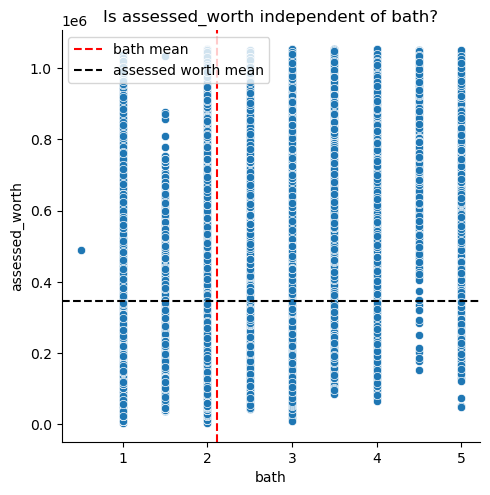

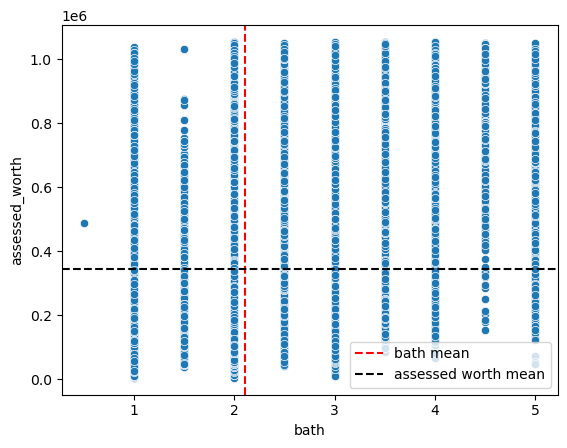

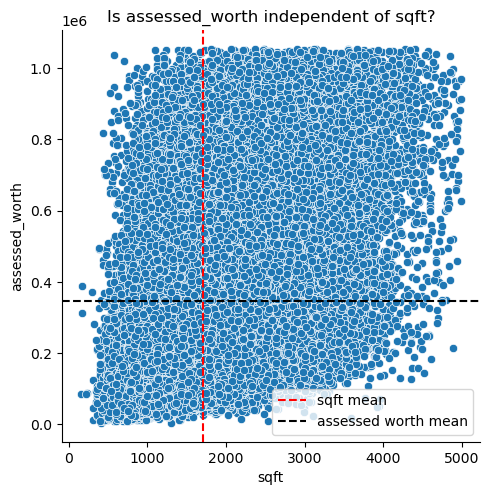

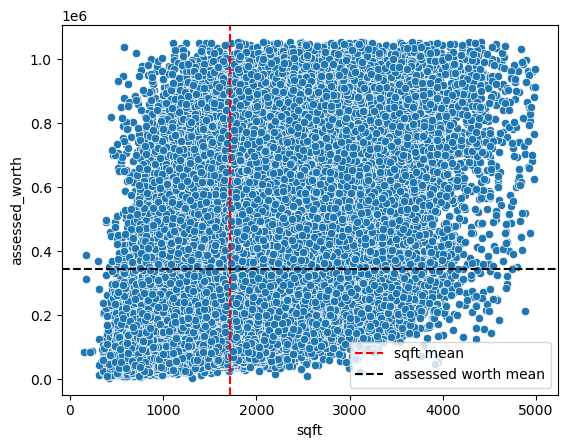

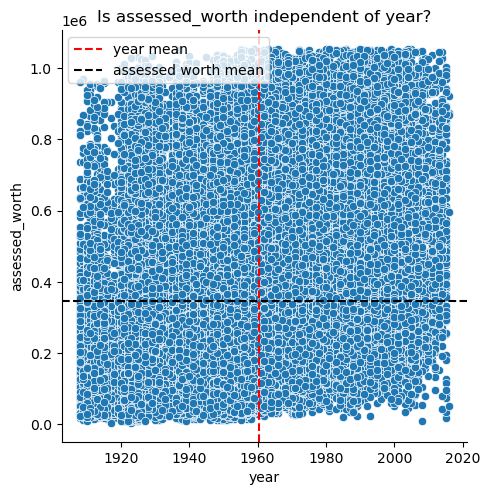

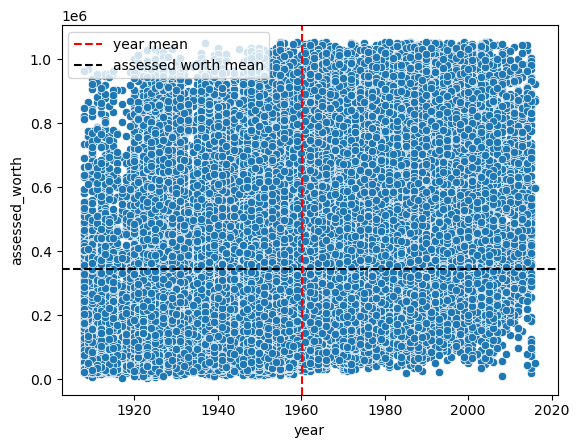

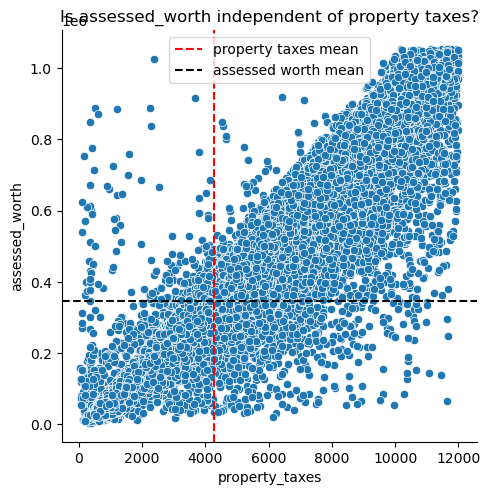

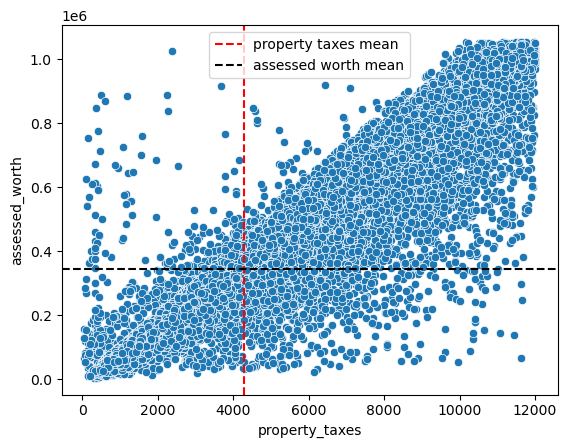

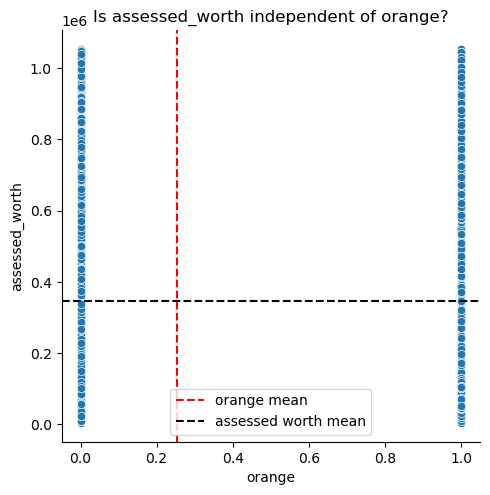

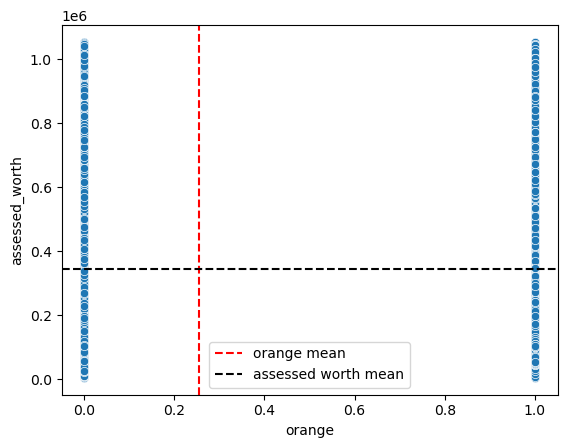

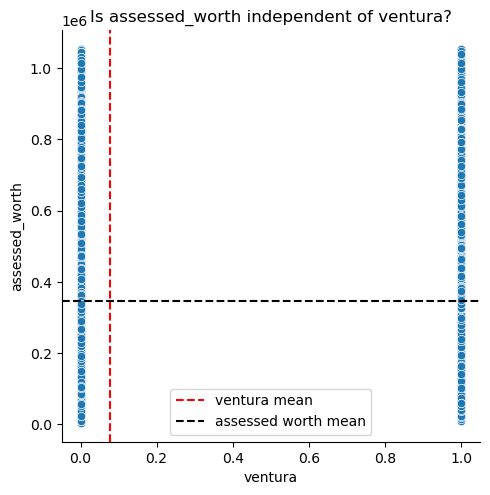

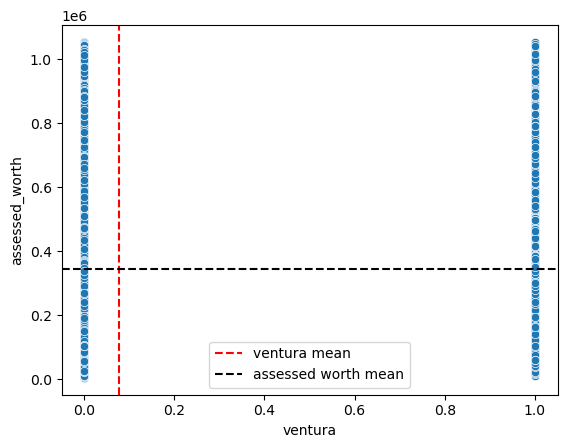

In [13]:
# multivariate analysis
ex.plot_categorical_and_continuous_vars(train.sample(120_000))

<div class="alert alert-block alert-info">  

## Takeaways:

This is the second iteration. I had to cut outliers more so that I could see the actual relationships. There was too much noise before.
    
**Questions:**
* What features contribute to worth the most? `Bath Count and Sqft`
    * the least? `Bed Count and Year`
* Where are the strongest correlations? `Bath Count and Sqft`
* What are my two top features? `Property Taxes (won't use), Bath, Sqft`
    
**Interesting relationships:**
* Bath and Sqft have a correlation of .82!
* Orange County has relatively newer homes with higher values
* LA has older homes with below average value
* LA has older houses worth more
* Avg Sqft is 1,800
    * houses above 4,000 trend up in value only
    * Sqft matters more in Orange and LA county
* As expected, property taxes and assessed worth have a positive relationship at .99
    * Orange has a higher correlation with taxes and worth
    * Higher worth and less taxes
    LA has lower worth and higher taxes
   
    
**Actions for this iteration:**
    
* focus on the audience buying single family residential homes
  
* Cut baths down to 9
* Cut beds down to 7
* Cut sqft down to 5,000
* Cut years below 1900
* Identified and removed Assessed Worth outliers using IQR*1.5 (thank you Amanda!)
* **skew has been addressed**
    
---
    
**What kind of features will I look at engineering?**

* Full and half bath
* Age and Sqft
* Bath and Sqft
* Sqft and property taxes

<div class="alert alert-block alert-info"> 
    
## Stats
    
**Questions:**
* What features contribute to worth the most? `Bath Count and Sqft`
    * the least? `Bed Count and Year`
* Where are the strongest correlations? `Bath Count and Sqft`
* What are my two top features? `Property Taxes (won't use), Bath, Sqft`
    
---
    
**Stats Checklist:**
* Hypothesize
* Visualize
* Analyze (with stats!)
    * discrete - discrete = chi 2
    * discrete - continous = means test
    * continous - continous = correlation
* Summarize
    <div>

In [14]:
train.dtypes

assessed_worth    float64
bed                 int64
bath              float64
sqft              float64
year                int64
property_taxes    float64
orange              uint8
ventura             uint8
dtype: object

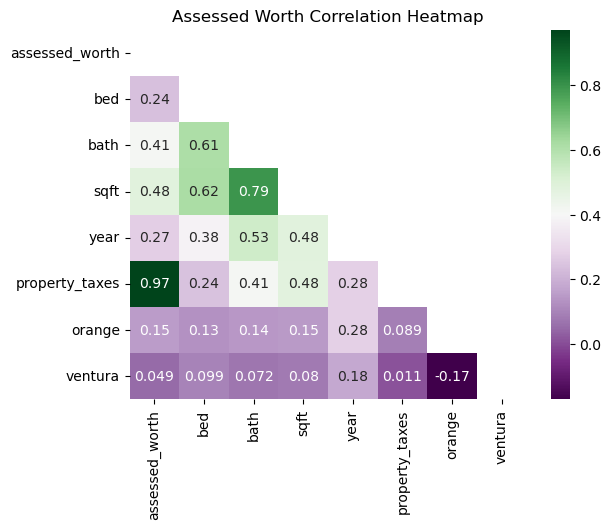

In [15]:
# Correlation
worth_corr = train.corr(method='pearson')
sns.heatmap(worth_corr, cmap='PRGn', annot=True, mask=np.triu(worth_corr))
plt.title(f"Assessed Worth Correlation Heatmap")
plt.show()

<div class="alert alert-block alert-info">
    Questions:
    
* What features contribute to worth the most? Bath `corr = .4` Bed `corr = .25` Year `corr = .28`
    * the least? Bed Count and Year `corr = .4`
* Where are the strongest correlations? Bath Count and Sqft `corr = .8`
* What are my two most correlated features? Property Taxes (won't use), Bath, Sqft
* What are my two lease correlated features? Bed and Year

---

$H_0$: The mean of bedrooms is != to the $\mu$ of home value

$H_a$: The mean of bedrooms is = to the $\mu$ of home value

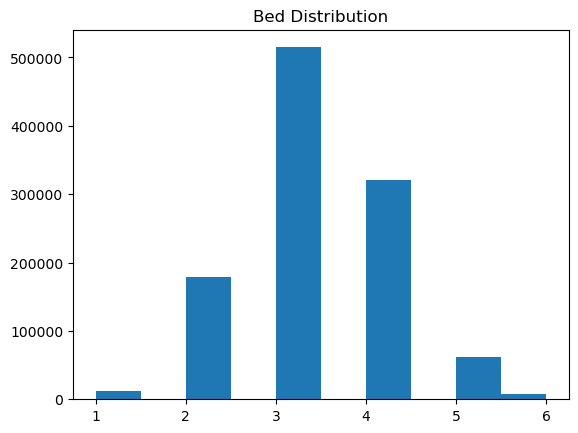

In [16]:
# Visualize
plt.hist(train.bed)
plt.title(f'Bed Distribution')
plt.show()

In [17]:
# Analyze
# Using one sample, two-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.bed, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -423844680.5084646 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


---

$H_0$: The mean of bathrooms is <= the $\mu$ of home value

$H_a$: The mean of bathrooms is greater than the $\mu$ of home value

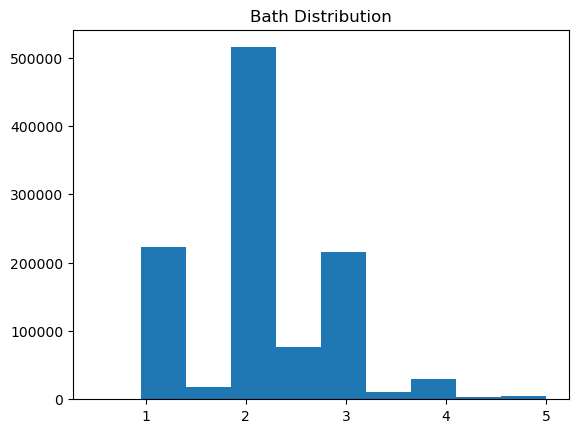

In [18]:
# Visualize
plt.hist(train.bath)
plt.title(f'Bath Distribution')
plt.show()

In [19]:
# Analyze
# Using one sample, left-tailed, t-test with assumptions met
sc.conclude_1samp_lt(train.bath, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -467567031.36730355 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


---

$H_0$: The mean of sqft is = the $\mu$ of home value

$H_a$: The mean of sqft is != to the $\mu$ of home value

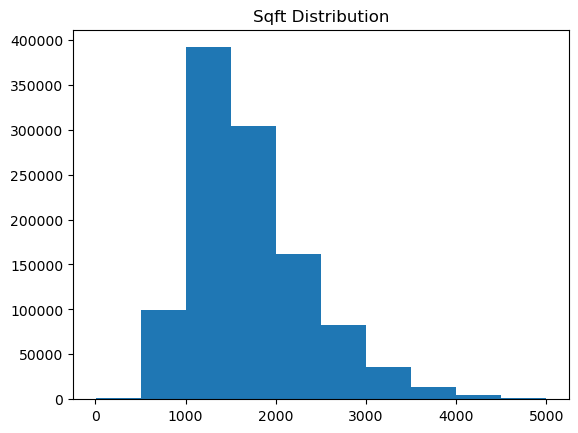

In [20]:
# Visualize
plt.hist(train.sqft)
plt.title(f'Sqft Distribution')
plt.show()

In [21]:
# Analyze
# Using one sample t-test with assumptions met
sc.conclude_1samp_tt(train.sqft, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -546810.6639920123 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


---

$H_0$: The mean of year is <= the $\mu$ of home value

$H_a$: The mean of year is greater than the $\mu$ of home value

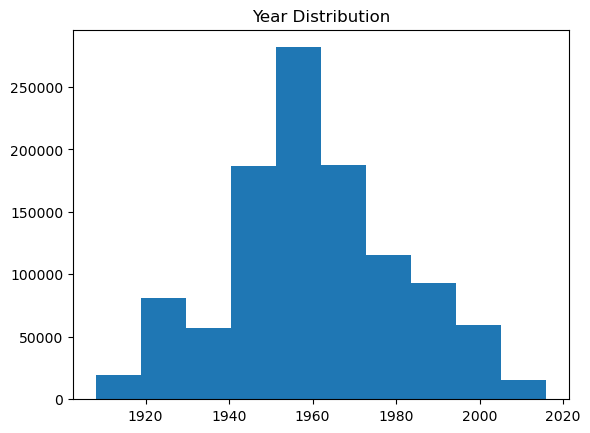

In [22]:
# Visualize
plt.hist(train.year)
plt.title(f'Year Distribution')
plt.show()

In [23]:
# Analyze
# Using one sample t-test with assumptions met
sc.conclude_1samp_lt(train.year, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -17495965.246123683 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


---

$H_0$: The mean of property taxes is <= the $\mu$ of home value

$H_a$: The mean of property taxes is > to the $\mu$ of home value

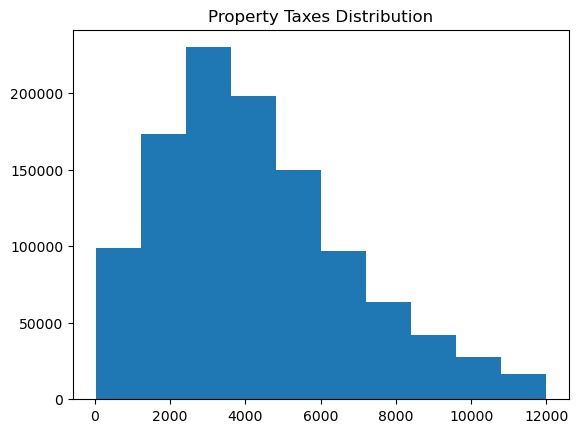

In [24]:
# Visualize
plt.hist(train.property_taxes)
plt.title(f'Property Taxes Distribution')
plt.show()

In [25]:
# Analyze
# Using one sample, left-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.property_taxes, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -143979.96031495728 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


<div class="alert alert-block alert-info"> 
    
## Takeaways:

What independent variables are correlated with the dependent variable, home value?
    
* All of them are correlated

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
    
* They all have a correlation factor

In [26]:
sc.iterate_columns(train)

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0
...,...,...,...,...,...,...,...,...
1355213,339549.0,4,3.0,2687.0,1976,3854.92,1,0
2098241,909000.0,5,3.0,2946.0,1996,9146.32,1,0
1476337,315383.0,3,1.0,1380.0,1912,4033.18,0,0
1112916,34329.0,2,1.0,1076.0,1934,736.10,0,0


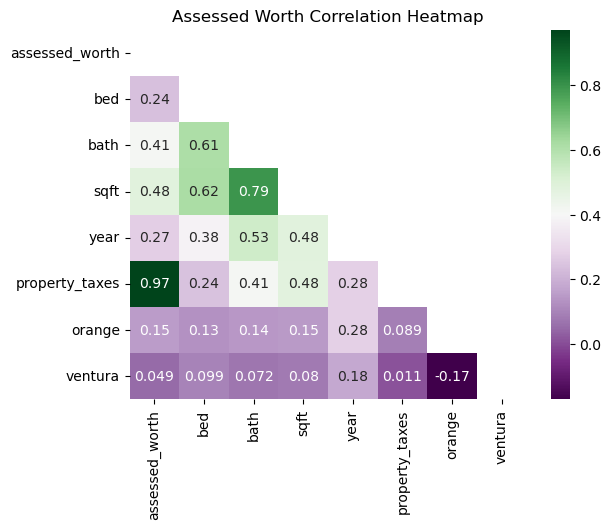

In [27]:
# Correlation
worth_corr = train.corr(method='pearson')
sns.heatmap(worth_corr, cmap='PRGn', annot=True, mask=np.triu(worth_corr))
plt.title(f"Assessed Worth Correlation Heatmap")
plt.show()

<div class="alert alert-block alert-info"> 
    
## Regression Model:
    
#### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of assessed_worth using only sqft.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [28]:
import evaluate_zillow as ev

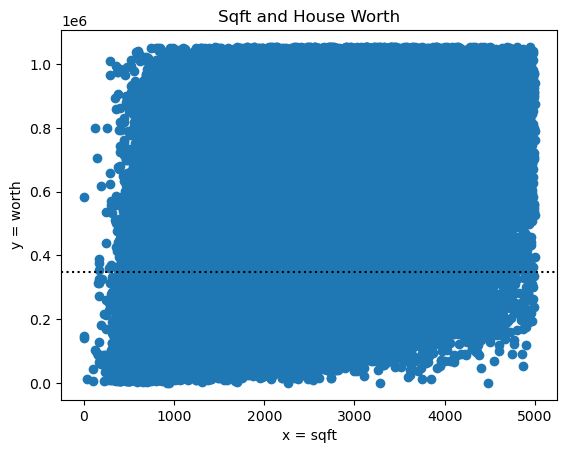

In [29]:
#plot our variables
plt.scatter(train.sqft, train.assessed_worth)

plt.xlabel('x = sqft')
plt.ylabel('y = worth')
plt.axhline(train.assessed_worth.mean(), ls=':', color='black')
plt.title(f"Sqft and House Worth")
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

# make and fit the thing
model = LinearRegression().fit(train[['sqft']], train[['assessed_worth']])

# use the thing
predictions = model.predict(train[['sqft']])
predictions

array([[320685.76712268],
       [283983.53059226],
       [513973.52806456],
       ...,
       [293279.29355629],
       [244556.67388272],
       [362997.51578657]])

In [31]:
# setting yhat baseline
train['yhat_baseline'] = train.assessed_worth.mean()
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548


In [32]:
# setting yhat
train['yhat'] = predictions

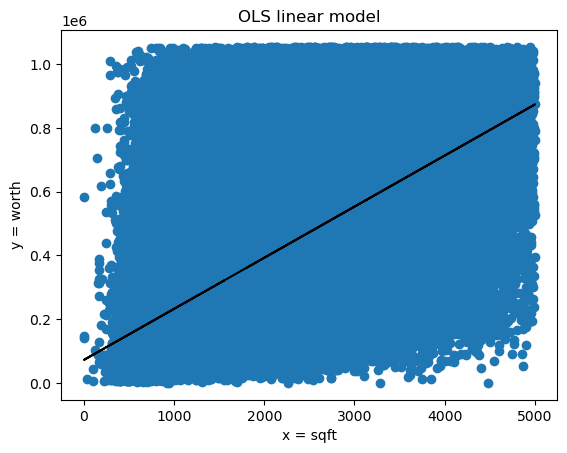

In [33]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.sqft, train.assessed_worth)

#lineplot is my regression line
plt.plot(train.sqft, train.yhat, color='black')


plt.xlabel('x = sqft')
plt.ylabel('y = worth')
plt.title('OLS linear model')
plt.show()

### Regression Metrics

#### Vocabulary

Residual: error (change in actual and predicted) <br>
SSE: sum of squared error<br>
MSE: mean squared error<br>
RMSE: root mean squared error<br>

### Residual Error

In [34]:
# residual = actual - predicted
train['baseline_residual'] = train.assessed_worth - train.yhat_baseline
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline,yhat,baseline_residual
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548,320685.767123,144533.282452
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548,283983.530592,-292344.717548
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548,513973.528065,393517.282452
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548,301292.882318,-122886.717548
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548,348092.240689,-98687.717548


In [35]:
# residual = actual - predicted
train['residuals'] = train.assessed_worth - train.yhat
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline,yhat,baseline_residual,residuals
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548,320685.767123,144533.282452,170735.232877
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548,283983.530592,-292344.717548,-229440.530592
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548,513973.528065,393517.282452,226431.471935
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548,301292.882318,-122886.717548,-77291.882318
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548,348092.240689,-98687.717548,-99892.240689


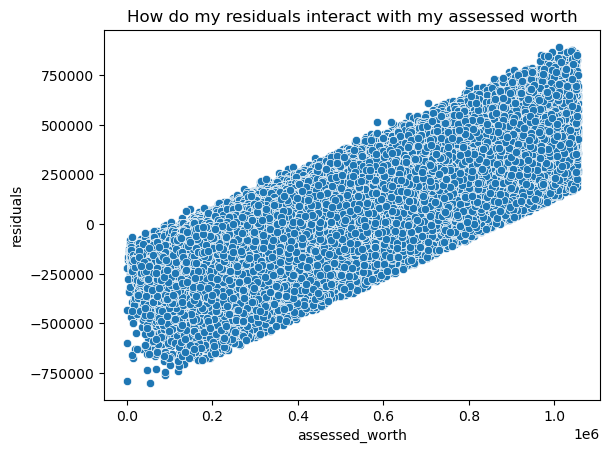

In [36]:
# plotting the residuals
sns.scatterplot(data=train, y='residuals', x='assessed_worth')
plt.title('How do my residuals interact with my assessed worth')
plt.show()

### SSE

In [37]:
# the difference between yhat and target, just squared
train['baseline_residual_2'] = train.baseline_residual ** 2
train['residual_2'] = train.residuals **2 
train.head()

,assessed_worth,bed,bath,sqft,year,property_taxes,orange,ventura,yhat_baseline,yhat,baseline_residual,residuals,baseline_residual_2,residual_2
1954106,491421.0,3,2.0,1551.0,1950,6034.28,0,0,346887.717548,320685.767123,144533.282452,170735.232877,2.088987e+10,2.915052e+10
934733,54543.0,3,1.5,1322.0,1957,943.38,1,0,346887.717548,283983.530592,-292344.717548,-229440.530592,8.546543e+10,5.264296e+10
707024,740405.0,4,3.0,2757.0,1964,8794.01,0,0,346887.717548,513973.528065,393517.282452,226431.471935,1.548559e+11,5.127121e+10
1129674,224001.0,2,2.5,1430.0,1975,2216.12,1,0,346887.717548,301292.882318,-122886.717548,-77291.882318,1.510115e+10,5.974035e+09
458836,248200.0,3,1.0,1722.0,1947,3345.51,0,0,346887.717548,348092.240689,-98687.717548,-99892.240689,9.739266e+09,9.978460e+09


In [38]:
# add the residuals together
SSE_baseline = train.baseline_residual_2.sum()
SSE = train.residual_2.sum()
print("SSE_baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE_baseline = 52842865682402960.0
SSE = 40537110589389336.0


### MSE

In [41]:
#calcaluate MSE
MSE_baseline = SSE_baseline/len(train)
MSE = SSE/len(train)

print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 48193582577.6
MSE = 36970526889.8


In [42]:
from sklearn.metrics import mean_squared_error
# shorthand
MSE = mean_squared_error(train.assessed_worth, train.yhat)
MSE

36970526889.80314

In [43]:
# shorthand
# dollars squared
SSE = MSE * len(train)
SSE

4.0537110589389336e+16

### RMSE

In [44]:
# calculate RMSE
RMSE_baseline = MSE_baseline ** .5
RMSE = MSE ** .5

print("RMSE baseline = ", "{:.2f}".format(RMSE_baseline))
print("RMSE = ", "{:.2f}".format(RMSE))

RMSE baseline =  219530.37
RMSE =  192277.21


In [45]:
# shorthand
# How much error we have in one housing price!
RMSE = MSE ** .5
RMSE.round(2)

192277.21

### ESS

Used with TSS as another way to calculate R2

In [46]:
ESS = sum((train.yhat - train.assessed_worth.mean())**2)
ESS

1.2305755093012246e+16

In [47]:
TSS = ESS + SSE
TSS

5.284286568240158e+16

In [48]:
# another way to calculate R2
(ESS/TSS).round(4)

0.2329

In [49]:
# testing against baseline
MSE_baseline = mean_squared_error(train.assessed_worth, train.yhat_baseline)
MSE_baseline

48193582577.56289

In [50]:
# testing against baseline
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

5.284286568240296e+16

In [51]:
# testing against baseline
RMSE_baseline = MSE_baseline ** .5
RMSE_baseline.round(2)

219530.37

### Variance

### R2

In [52]:
# import r2
from sklearn.metrics import r2_score

In [53]:
# use r2_score
round(r2_score(train.assessed_worth, train.yhat),4)

0.2329

### Is my model better than the baseline model?

My model is better than baseline, however, it's not that great.

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

### Python Code

In [54]:
def better_than_baseline(SSE, SSE_baseline):
    if SSE < SSE_baseline:
        return True
    else:
        return False

In [55]:
better_than_baseline(SSE, SSE_baseline)

True

<div class="alert alert-block alert-info"> 

## Feature Engineering:
    
---
    
Manual Feature Engineering:

bed + bath = room_count <br>
total_sqft -200 * bedroooms - 40 * bathrooms = living_area "estimating sqft per room based or total_sqft" <br>
Year binned into likely styles of the home .. mid-century, ranch, etc.<br>
Continous to Categorical - Quantization to Discretization<br>
worth of house could be binned to low wealth, medium wealth, and high wealth.

---
    
Automated Feature Engineering:<br>
Feature Selections by assigning a score of weight<br>